# Test `FigureManager`

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pydove import FigureManager

## Basic usage

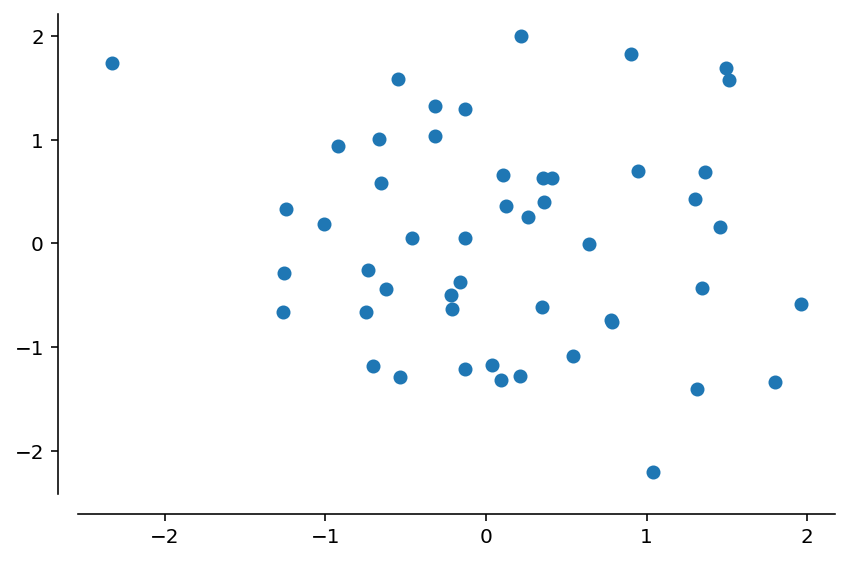

In [2]:
rng = np.random.default_rng(0)
with FigureManager() as (_, ax):
    ax.scatter(rng.normal(size=50), rng.normal(size=50))

## Two panels

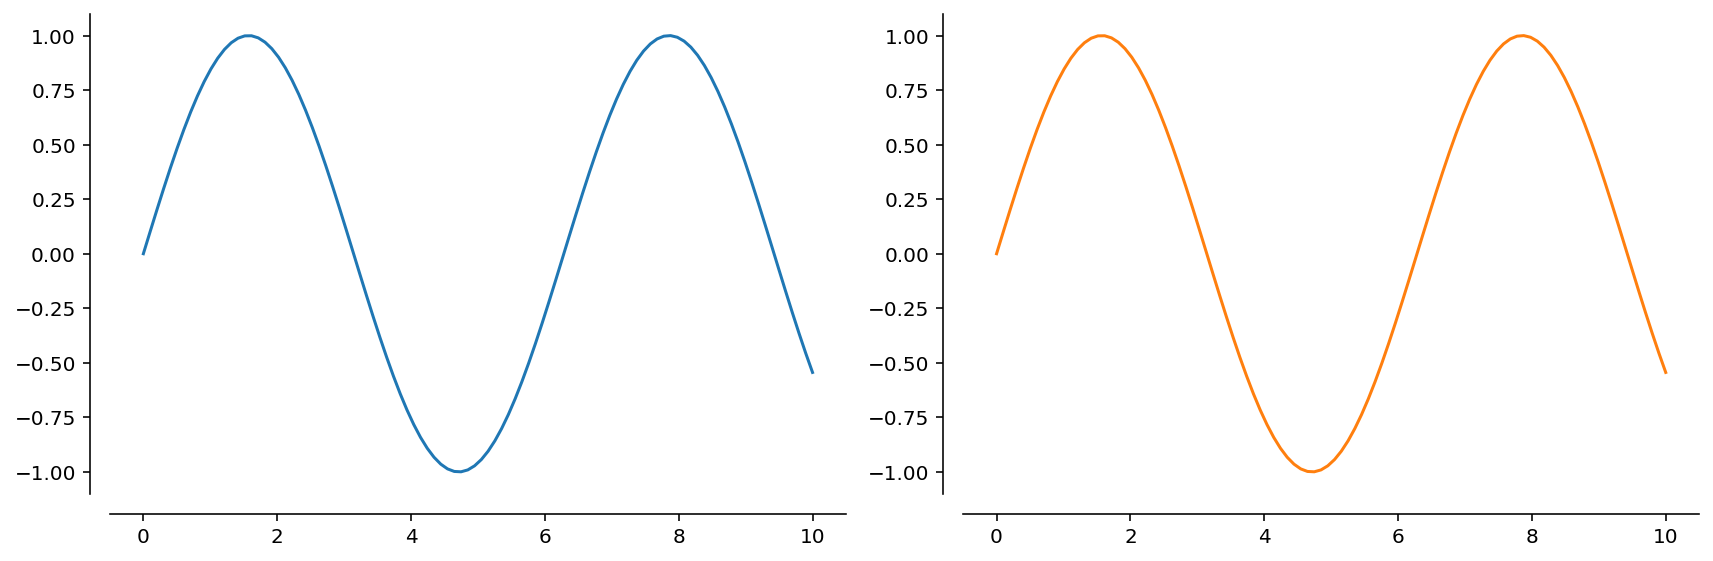

In [3]:
with FigureManager(1, 2) as (_, axs):
    x = np.linspace(0, 10, 100)
    for i, ax in enumerate(axs):
        ax.plot(x, np.sin(x), c=f"C{i}")

## More panels

The context manager scales the figure size according to the number of panels so that each panel is the size of a standard figure.

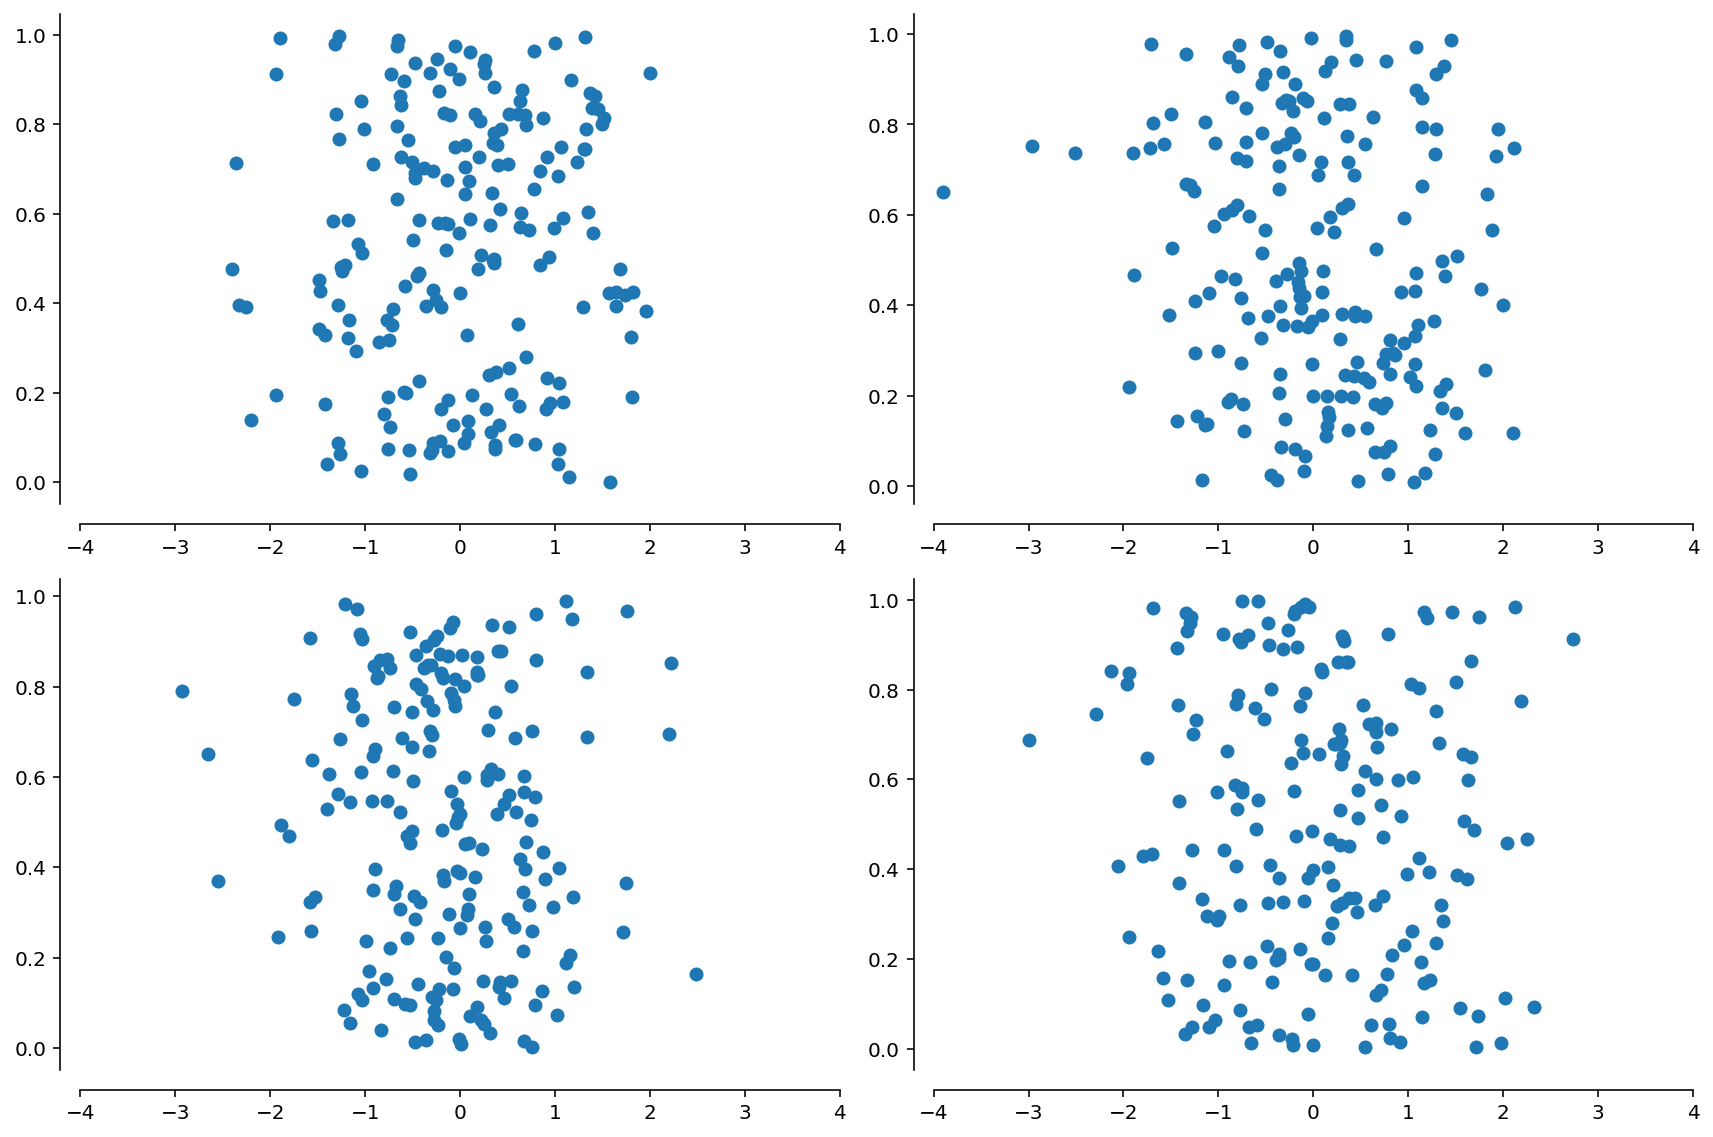

In [4]:
rng = np.random.default_rng(0)
with FigureManager(2, 2) as (_, axs):
    for ax in axs.flat:
        ax.scatter(rng.normal(size=200), rng.uniform(size=200))
        ax.set_xlim(-4, 4)

## Custom offset, additional keywords

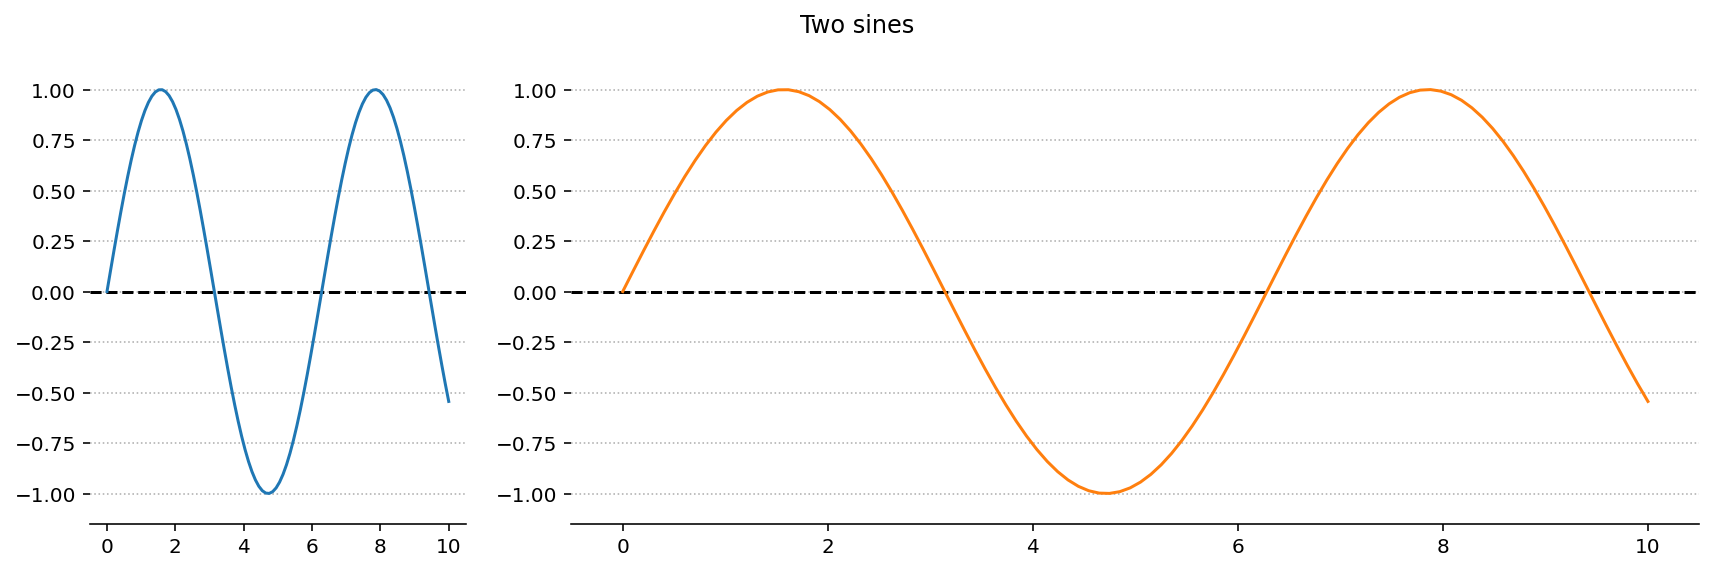

In [5]:
with FigureManager(
    1, 2, offset=5, gridspec_kw={"width_ratios": [1, 3]}, despine_kws={"left": True}
) as (fig, axs):
    x = np.linspace(0, 10, 100)
    for i, ax in enumerate(axs):
        ax.axhline(0, c="k", ls="--")
        ax.plot(x, np.sin(x), c=f"C{i}")
        ax.grid(axis="y", ls=":")
    fig.suptitle("Two sines")